# Part I. Root-finding. Newton's iteration.

Write a function which performs Newton's iteration for a given function $f(x)$ with known derivative $f'(x)$. Your function should find the root of $f(x)$ with a predefined absolute accuracy $\epsilon$. 

In [116]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000):
    """Find a root of $f(x) = 0$ via Newton's iteration starting from x0.
    
    Parameters
    ----------
    f : callable
        The function to find a root of.
    fder : callable
        The derivative of `f`.
    x0 : float
        Initial value for the Newton's iteration.
    eps : float
        The target accuracy. 
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.
        
    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    x = 0
    x_n = x0
    niter = 0
    while (abs(x - x_n) > eps) and (niter < maxiter):
        x = x_n
        x_n = x - f(x)/fder(x)
        niter += 1
    return x_n, niter

### Test I.1 

Test your implementation on a simple example, $f(x) = x^2 - 1$ or similar. (20% of the total grade)

In [192]:
r, n = newton_iteration(lambda x: x**2 - 1, lambda x: 2*x, x0 = -0.5) #Нашли первый корень
print("root:", r, ',',' iterations:', n)

root: -1.000000000000001 ,  iterations: 5


In [191]:
r, n = newton_iteration(lambda x: x**2 - 1, lambda x: 2*x, x0 = 10) #Нашли второй корень
print("root:", r, ',',' iterations:', n)

root: 1.0000000000139897 ,  iterations: 7


Найдем корень функции $f(x) = x^3 - 1$

In [190]:
r, n = newton_iteration(lambda x: x**3 - 1, lambda x: 3*x**2, x0 = 10)
print("root:", r, ',',' iterations:', n)

root: 1.0000000000000004 ,  iterations: 10


### Test I.2

Now consider a function which has a multiple root. Take $f(x) = (x^2 - 1)^2$ as an example. Implement a modified Newton's iteraion,

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

and vary $m= 1, 2, 3, 4, 5$. Check the number of iterations required for convergence within a fixed $\epsilon$. Are your observations consistent with the expectation that the convergence is quadratic is $m$ equals the multiplicity of the root, and is linear otherwise? (40% of the total grade)

In [78]:
def modified_newton_iteration(f, fder, x0, m, eps=1e-5, maxiter=1000): #Отдельно реализовала модифицированный метод
    x = 0
    x_n = x0
    niter = 0
    while (abs(x - x_n) > eps) and (niter < maxiter):
        x = x_n
        x_n = x - m*f(x)/fder(x) # домножили на m
        niter += 1
    return x_n, niter

Тесты:

In [186]:
r = [0]*5
n = [0]*5
for i in range(5):
    r[i], n[i] = modified_newton_iteration(lambda x: (x**2 - 1)**2, lambda x: 4*x*(x**2 - 1), x0 = -2, m = i+1)
    print('m =', i+1,',', ' iterations: ', n[i],',', ' root =', round(r[i],5), '\n')

m = 1 ,  iterations:  18 ,  root = -1.00001 

m = 2 ,  iterations:  5 ,  root = -1.0 

m = 3 ,  iterations:  17 ,  root = -1.0 

m = 4 ,  iterations:  1000 ,  root = -2.0 

m = 5 ,  iterations:  1000 ,  root = -2.23968 



In [185]:
r = [0]*5
n = [0]*5
for i in range(5):
    r[i], n[i] = modified_newton_iteration(lambda x: (x**2 - 1)**2, lambda x: 4*x*(x**2 - 1), x0 = 10, m = i+1)
    print('m =', i+1,',', ' iterations: ', n[i],',', ' root =', round(r[i],5), '\n')

m = 1 ,  iterations:  24 ,  root = 1.00001 

m = 2 ,  iterations:  7 ,  root = 1.0 

m = 3 ,  iterations:  17 ,  root = 1.0 

m = 4 ,  iterations:  1000 ,  root = 10.0 

m = 5 ,  iterations:  1000 ,  root = 1.55057 



CONCLUSION: Indeed, if $m$ equals the multiplicity of the root, the Newton's method converges best.

# Part II. Fixed-point iteration

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$. Compare the result to an estimate from a visual inspection.

Next, rewrite the fixed-point problem in the form

$$
x = x - \alpha f(x)
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$. Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval. (40% of the total grade)

Text(0.25, 1.15, 'Корень x ≈ 0.64')

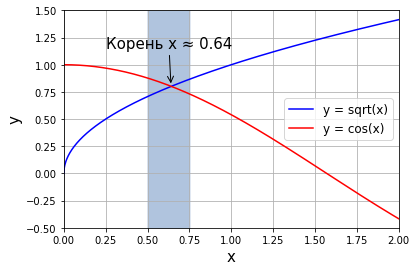

In [205]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)

x = np.linspace(0, 2, 1000)
y = np.linspace(-0.5, 1.5, 1000)
plt.xlim(0, 2)
plt.ylim(-0.5, 1.5)

plt.plot(x, np.sqrt(x), color='blue', label='y = sqrt(x)')
plt.plot(x, np.cos(x), color='red', label='y = cos(x)')
plt.fill_betweenx(y, 0.5, 0.75, color='#b0c4de')  #Графическая локализация корня по оси х
plt.legend(loc='right', fontsize='12')
plt.grid()

plt.annotate('Корень x ≈ 0.64', 
             fontsize=15,
             xy=(0.64 , 0.81),
             xytext=(0.25 , 1.15),
             arrowprops=dict(arrowstyle='->', color='black'))

1. Fixed-point iteration:

In [206]:
def fixed_point_iteration(f, x0, eps=1e-5, maxiter=1000):
    x = 0
    x_n = x0
    niter = 0
    while (abs(x - x_n) > eps) and (niter < maxiter):
        x = x_n
        x_n = x - f(x)
        niter += 1
    return x_n, niter

In [207]:
r, n = fixed_point_iteration(lambda x: np.sqrt(x) - np.cos(x), x0 = 0.25)
print("root:", round(r, 5), ',',' iterations:', n)

root: 0.64171 ,  iterations: 9


Корень совпал с ожидаемым.

2. Fixed-point iteration with $\alpha$:

In [208]:
def tuned_fixed_point_iteration(f, x0, a, eps=1e-5, maxiter=1000):
    x = 0
    x_n = x0
    niter = 0
    while (abs(x - x_n) > eps) and (niter < maxiter):
        x = x_n
        x_n = x - a*f(x)
        niter += 1
    return x_n, niter

In [237]:
#Ищем оптимальный коэффициент альфа

alpha = np.linspace(0.001, 1, 1000)
l = len(alpha)
r = [0]*l
n = [0]*l

for i in range(l):
    r[i], n[i] = tuned_fixed_point_iteration(lambda x: np.sqrt(x) - np.cos(x), x0 = 0.25, a = alpha[i])
k = np.argmin(n)
print("Найденная оптимальная alpha =", round(alpha[k], 3), ',', ' iterations: ', n[k],',', ' root =', round(r[k], 5))

Найденная оптимальная alpha = 0.818 ,  iterations:  3 ,  root = 0.64171


Вычислим альфа по данной формуле. Сначала посмотрим, как ведет себя производная на выделенном участке по х:

(1, 1.5)

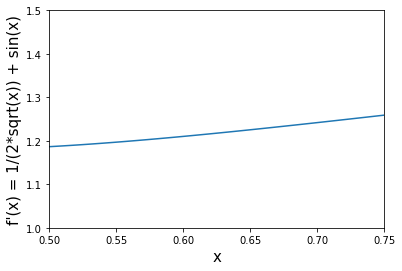

In [234]:
plt.figure()
plt.xlabel('x', fontsize=15)
plt.ylabel("f'(x) = 1/(2*sqrt(x)) + sin(x)", fontsize=15)

x = np.linspace(0.5, 0.75, 100)
f = 1/2/np.sqrt(x) + np.sin(x)
plt.plot(x, f)
plt.xlim(0.5, 0.75)
plt.ylim(1, 1.5)

На `(0.5, 0.75)` производная монотонно возрастает. Следовательно, $m = f'(0.5), M = f'(0.75)$. Вычислим это значение:

In [238]:
f = lambda x: 1/2/np.sqrt(x) + np.sin(x)
a0 = 2 / (f(0.5) + f(0.75))
print("Вычисленная alpha:", round(a0, 3))

Вычисленная alpha: 0.818


Итак, коэффициенты $\alpha$, найденные двумя разными способами, совпадают. Значит, это и есть оптимальный коэффициент.

# Part III. Newton's fractal.

(Not graded). 

Consider the equation

$$
x^3 = 1
$$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the \emph{basins of attraction} of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points. 
Color the grid in three colors, according to the root, to which iterations converged.